# Чтение и запись данных


In [20]:
import urllib.request as req
import json
import pandas as pd
from matplotlib import pyplot as plt

## Урок 1. Чтение данных из web-сервиса

### Практика

#### Задание 1

Используя сервис MetaWeather, найдите идентификатор города Париж (Paris). Для запроса используйте адрес из следующей ячейки, заменив `%city%` на имя города.

In [7]:
city = 'Paris'
url = f"https://www.metaweather.com/api/location/search/?query={city}"
url

with req.urlopen(url) as session:
    response = session.read().decode()

response = json.loads(response)
    
city_id = response[0]['woeid']
city_id

615702

#### Задание 2

Используя полученный идентификатор города, запросите данные о погоде в Париже за 28 мая 2020 года. Для запроса используйте адрес из следующей ячейки, заменив `%city_id%`, `%year%`, `%month%`, `%day%` на идентификатор города, год, месяц и день соответственно.

In [9]:
year = '2020'
month = '06'
day = '28'


url = f'https://www.metaweather.com/api/location/{city_id}/{year}/{month}/{day}/'
url

'https://www.metaweather.com/api/location/615702/2020/06/28/'

In [16]:
with req.urlopen(url) as session:
    response = session.read().decode()

# response = json.loads(response)
# response

In [38]:
df = pd.read_json(response, convert_dates=['created', 'applicable_date'])


In [39]:
df.dtypes

id                                      int64
weather_state_name                     object
weather_state_abbr                     object
wind_direction_compass                 object
created                   datetime64[ns, UTC]
applicable_date                datetime64[ns]
min_temp                              float64
max_temp                              float64
the_temp                              float64
wind_speed                            float64
wind_direction                        float64
air_pressure                          float64
humidity                                int64
visibility                            float64
predictability                          int64
dtype: object

In [40]:
df.head()

,id,weather_state_name,weather_state_abbr,wind_direction_compass,created,applicable_date,min_temp,max_temp,the_temp,wind_speed,wind_direction,air_pressure,humidity,visibility,predictability
0,4689894351831040,Showers,s,WSW,2020-06-28 21:37:04.785995+00:00,2020-06-28,16.605,21.605,20.955,8.342198,243.501678,1015.5,59,12.268042,73
1,6422688522305536,Showers,s,WSW,2020-06-28 18:37:05.388908+00:00,2020-06-28,15.920,23.420,22.860,8.366793,238.833985,1015.5,52,12.343228,73
2,4716131417849856,Showers,s,WSW,2020-06-28 15:37:05.758353+00:00,2020-06-28,15.920,23.420,22.860,8.366793,238.833985,1015.5,52,12.343228,73
3,5549963515789312,Showers,s,WSW,2020-06-28 12:37:04.581450+00:00,2020-06-28,15.795,22.490,20.470,8.180382,238.170711,1016.0,60,12.343228,73
4,5317515624316928,Showers,s,WSW,2020-06-28 09:37:05.381099+00:00,2020-06-28,15.780,21.790,20.495,7.936166,237.834144,1016.0,60,11.450318,73


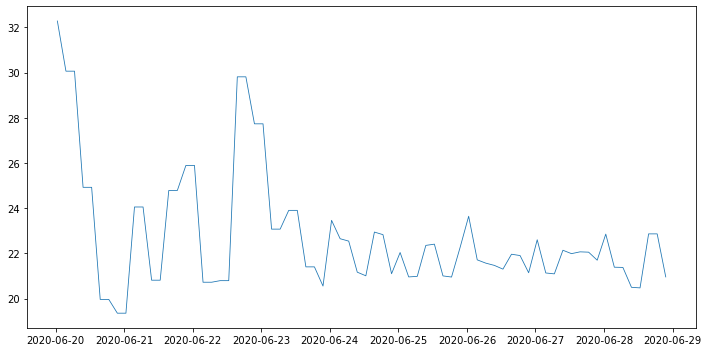

In [47]:
fig = plt.figure(figsize=(10,5))
plt.plot(df.created, df.the_temp, linewidth=.8)
plt.tight_layout()
plt.show()